In [1]:
import pandas as pd
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats as sm
from matplotlib import cm

In [2]:
# N_steps = 10
N_steps_orig = 1800 
N_k = 64
T_h = 18000
N_x = 21
N_y = 21

### Define input files


In [41]:
# result_loc = "./../../../../Server_results/10_04_2021_less_random/"
# run_name = "experiment04_10_11_04_40"

# result_loc = "./../../../../Server_results/10_12_2021_mul_q/"
# run_name = "experiment10_10_22_51_50"

result_loc = "./../../../../Server_results/10_24_2021_less_tol/"
run_name = "experiment23_10_01_07_23"

train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633563563/"

# run_name = "experiment06_10_11_17_57"
# train_loc = "Run_no_zero_flow_no_oscilations_Run_Run_1633466607/"

### Load files and reshape them

In [42]:

p = np.loadtxt(f"{result_loc}{run_name}p.txt")
p = p.reshape([-1,N_k])

N_epoch = p.shape[0]

q_x = np.loadtxt(f"{result_loc}{run_name}q_x.txt")
q_x = q_x.reshape([N_epoch,N_k,-1])
q_y = np.loadtxt(f"{result_loc}{run_name}q_y.txt")
q_y = q_y.reshape([N_epoch,N_k,-1])
k_x = np.loadtxt(f"{result_loc}{run_name}k_x.txt")
k_x = k_x.reshape([N_epoch,N_k,-1])
k_y = np.loadtxt(f"{result_loc}{run_name}k_y.txt")
k_y = k_y.reshape([N_epoch,N_k,-1])
k_xy = np.loadtxt(f"{result_loc}{run_name}k_xy.txt")
k_xy = k_xy.reshape([N_epoch,N_k,-1])

lam = np.loadtxt(f"{result_loc}{run_name}lambda.txt")

N_steps = q_x.shape[2]

In [43]:
q_x.shape

(79, 64, 50)

In [44]:
def plot_cdf(p,qoi,time_step,epoch,label=''):
    P = p[epoch]
    QOI = qoi[epoch,:,time_step]

    index = np.argsort(QOI)
    plt.plot(np.ravel([QOI[index],QOI[index]],'f'),np.ravel([np.array([0,*np.cumsum(P)[:-1]]),np.cumsum(P)],'F'),label=label)

Evolution of cdf for different lambda

In [45]:
q_MC_x = np.loadtxt(f"{train_loc}Q_x_5.txt")
q_MC_y = np.loadtxt(f"{train_loc}Q_y_5.txt")


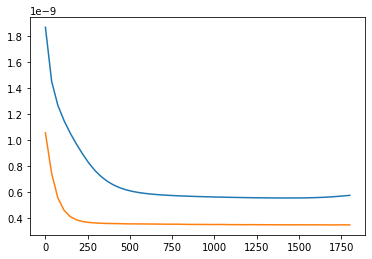

In [46]:
epoch = 1
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
epoch = 0
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))


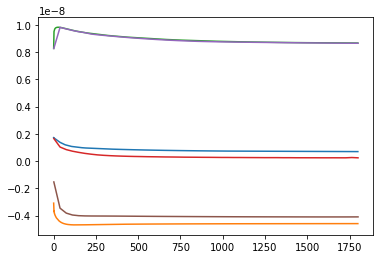

In [93]:
epoch = 51


plt.plot(q_MC_y.mean(axis=0))
plt.plot(q_MC_y.min(axis=0))
plt.plot(q_MC_y.max(axis=0))

# plt.plot(q_MC_y.min(axis=0))
# plt.plot(q_MC_y.max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),np.inner(q_y[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_y[epoch,0:4,:].min(axis=0))

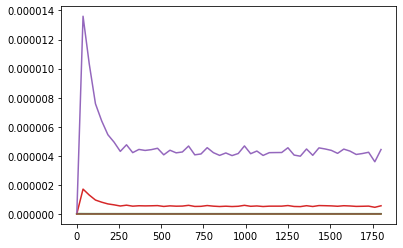

In [104]:
epoch = 41
plt.plot(q_MC_x.mean(axis=0))
plt.plot(q_MC_x.min(axis=0))
plt.plot(q_MC_x.max(axis=0))

plt.plot(np.linspace(1,1800,N_steps),np.inner(q_x[epoch,:,:].T,p[epoch,:]))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].max(axis=0))
plt.plot(np.linspace(1,1800,N_steps),q_x[epoch,0:4,:].min(axis=0))

In [92]:
p[50,:]

array([3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       3.12500000e-02, 3.12500000e-02, 3.12500000e-02, 3.12500000e-02,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
       1.16252374e-45, 1.16252374e-45, 1.16252374e-45, 1.16252374e-45,
      

In [91]:
k_x[50,:,40]

array([5.42271433e-03, 1.34445030e-05, 1.28677630e-05, 1.37923701e-05,
       1.95265367e-05, 9.22227736e-06, 1.07311062e-05, 1.54175739e-05,
       4.16942653e-03, 2.17145886e-05, 1.06680720e-05, 1.28825286e-05,
       1.63096010e-05, 9.26362969e-06, 1.28507614e-05, 1.62069177e-05,
       5.44171848e-03, 1.47579092e-05, 1.28672879e-05, 1.37536579e-05,
       1.63308990e-05, 9.22239442e-06, 1.07216164e-05, 1.21455978e-05,
       4.17013739e-03, 2.39285342e-05, 1.06674705e-05, 1.28823343e-05,
       1.63094366e-05, 9.26354192e-06, 1.28515632e-05, 1.62072712e-05,
       9.95519382e-06, 9.94620652e-06, 9.93425567e-06, 1.00037328e-05,
       9.94034054e-06, 9.95975407e-06, 9.90535405e-06, 9.92263258e-06,
       9.91828544e-06, 9.94485307e-06, 9.93252171e-06, 9.98080560e-06,
       9.93072734e-06, 9.95508930e-06, 9.95001409e-06, 9.92111834e-06,
       9.95309881e-06, 9.94219959e-06, 9.93245966e-06, 9.93762637e-06,
       9.96529083e-06, 9.95908124e-06, 9.93101741e-06, 9.93492902e-06,
      

In [51]:
k_xy[36,:,40]

array([-9.84981010e-09, -9.83074629e-09, -7.81932135e-09, -7.86146832e-09,
       -7.83501437e-09, -7.85250073e-09, -7.83845066e-09, -7.85045220e-09,
       -7.84474005e-09, -7.83654839e-09, -7.83314448e-09, -7.84006530e-09,
       -7.82023430e-09, -7.86082274e-09, -7.86159038e-09, -7.85553053e-09,
       -7.85205233e-09, -7.83348121e-09, -7.83374994e-09, -7.86997323e-09,
       -7.81843868e-09, -7.84268631e-09, -7.82310131e-09, -7.86672375e-09,
       -7.84157881e-09, -7.84100204e-09, -7.83717073e-09, -7.85623238e-09,
       -7.83874352e-09, -7.83649334e-09, -7.86797995e-09, -7.85082304e-09,
       -7.85617811e-09, -7.85920112e-09, -7.81886031e-09, -7.85634760e-09,
       -7.82904007e-09, -7.82781342e-09, -7.81254033e-09, -7.83967576e-09,
       -7.84373354e-09, -7.84657053e-09, -7.81169502e-09, -7.83127350e-09,
       -7.82580540e-09, -7.84511374e-09, -7.85525271e-09, -7.82253620e-09,
       -7.86134790e-09, -7.81365213e-09, -7.85497954e-09, -7.84506944e-09,
       -7.86353915e-09, -

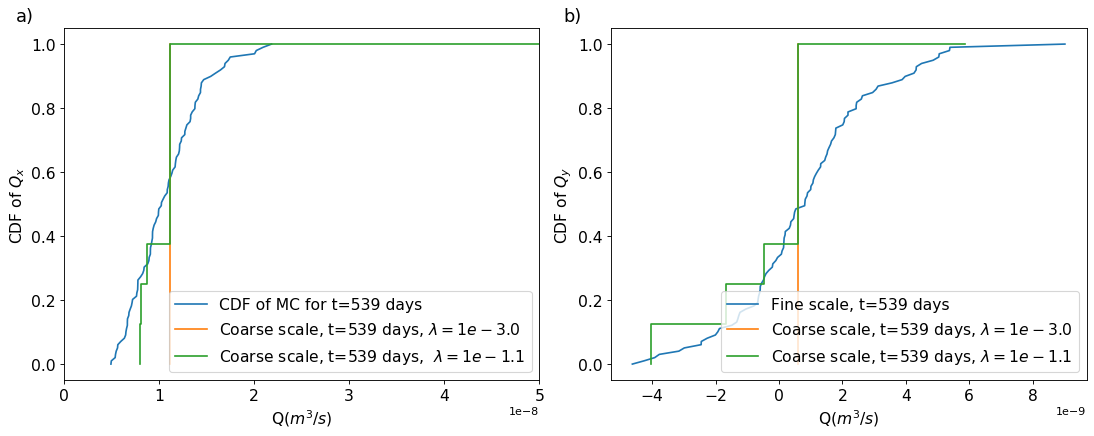

In [81]:
epoch_1 = 1
epoch_2 = 41

time_step = 15


my_dpi = 80
fig, axs = plt.subplots(1, 2, figsize=(1100/my_dpi, 400/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)
ax1 = plt.subplot(121)
ax1.text(-0.1, 1.02, 'a)', transform=ax1.transAxes,size=16)

ii = N_steps_orig//(N_steps-1) * (time_step) -1

Q_MC = q_MC_x[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'CDF of MC for t={ii} days')
plot_cdf(p,q_x ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_x ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days,  $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_x$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.xlim(0.0, 5.0e-8)

ax1 = plt.subplot(122)
ax1.text(-0.1, 1.02, 'b)', transform=ax1.transAxes,size=16)

Q_MC = q_MC_y[:,ii]

index_MC = np.argsort(Q_MC)
plt.plot(Q_MC[index_MC],np.linspace(0,1,100),label=rf'Fine scale, t={ii} days')
plot_cdf(p,q_y ,time_step,epoch_1,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_1],1)}$')
plot_cdf(p,q_y ,time_step,epoch_2,label=rf'Coarse scale, t={ii} days, $\lambda = 1e{np.round(lam[epoch_2],1)}$')

plt.xlabel(r'Q($m^3/s$)', fontsize= 14)
plt.ylabel(r'CDF of $Q_y$', fontsize= 14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.legend(loc=4, fontsize= 14)
plt.savefig('./../../../plots/2d_cdf_paper.pdf', bbox_inches='tight',dpi=my_dpi)

plt.show()

In [53]:
# x1_2d = k_y[epoch,:,:]
# w1 = p[epoch,:]
# d1 = sm.DescrStatsW(x1_2d, weights=w1)
# df_mean = d1.mean
# df_perc = d1.quantile([0.25,0.5,0.75]).values.T

In [27]:
# b_perc =df_perc


In [84]:
def plot_k(t,k,p,epoch):
    x1_2d = k[epoch,:,:]
    w1 = p[epoch,:]
    d1 = sm.DescrStatsW(x1_2d, weights=w1)
    df_mean = d1.mean
    df_perc = d1.quantile([0.25,0.5,0.75]).values.T
    b_perc =df_perc

    plt.fill_between(t,b_perc[:,0],b_perc[:,2],color=cm.get_cmap('tab20c')(3))
    plt.plot(t,b_perc[:,0], linewidth=2.5,label=r'$10^{th} / 90^{th}   percentile$',color=cm.get_cmap('tab20c')(0))
    plt.plot(t,b_perc[:,2], linewidth=2.5,color=cm.get_cmap('tab20c')(0))
    plt.plot(t,df_mean,linewidth=2.5,label=r'$Mean$',ls='--',color=cm.get_cmap('tab20c')(5))
    


In [85]:
epoch = 41
t = np.linspace(0,1800,N_steps)

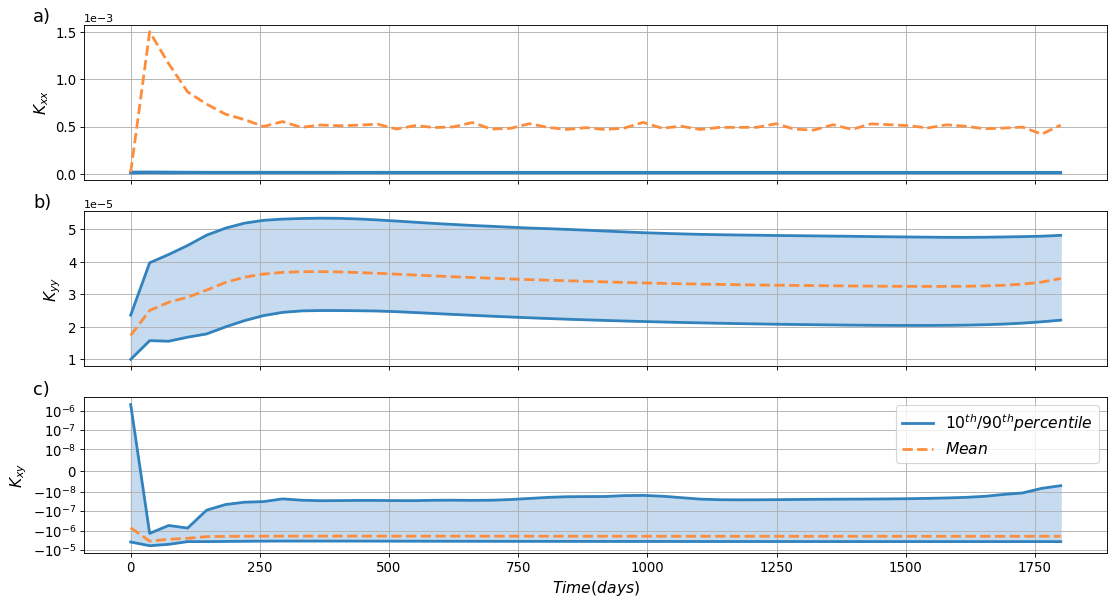

In [86]:
my_dpi = 80
fig, axs = plt.subplots(3, 1, figsize=(1100/my_dpi, 600/my_dpi), dpi=my_dpi)
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.15)

ax1 = plt.subplot(311)
plot_k(t,k_x,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax1.text(-0.05, 1.02, 'a)', transform=ax1.transAxes,size=16)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{xx}$', fontsize= 14)


ax2 = plt.subplot(312)
plot_k(t,k_y,p,epoch)
plt.yscale('linear')
plt.tick_params(axis='y',which='both', labelsize=12)
plt.grid()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax2.text(-0.05, 1.02, 'b)', transform=ax2.transAxes,size=16)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel(r'$K_{yy}$', fontsize= 14)


ax3 = plt.subplot(313)
plot_k(t,k_xy,p,epoch)
plt.yscale('symlog', linthreshy=1e-8)
plt.tick_params(axis='y',which='both', labelsize=12)
plt.tick_params(axis='x',which='both', labelsize=12)
plt.legend(loc=1, fontsize= 14)
plt.grid()
ax3.text(-0.05, 1.02, 'c)', transform=ax3.transAxes,size=16)
plt.ylabel(r'$K_{xy}$', fontsize= 14)

plt.xlabel(r'$Time (days)$', fontsize= 14)

plt.savefig('./../../../plots/2d_k_evo_paper.pdf', bbox_inches='tight',dpi=my_dpi)
